In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
data = pd.read_csv("museu.csv")

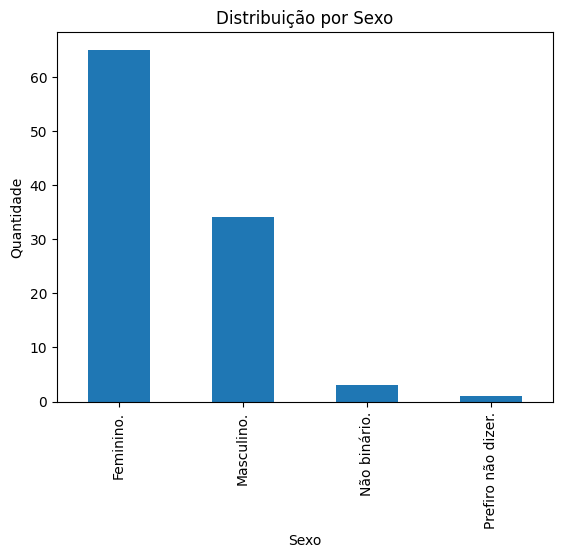

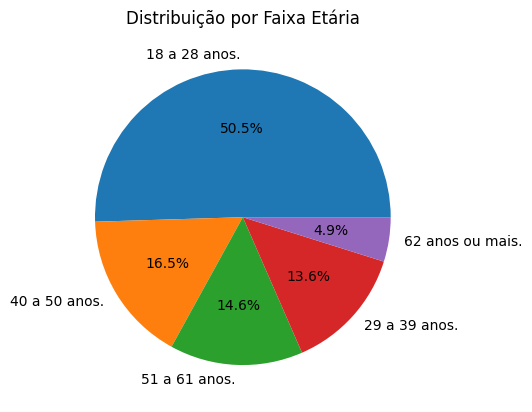

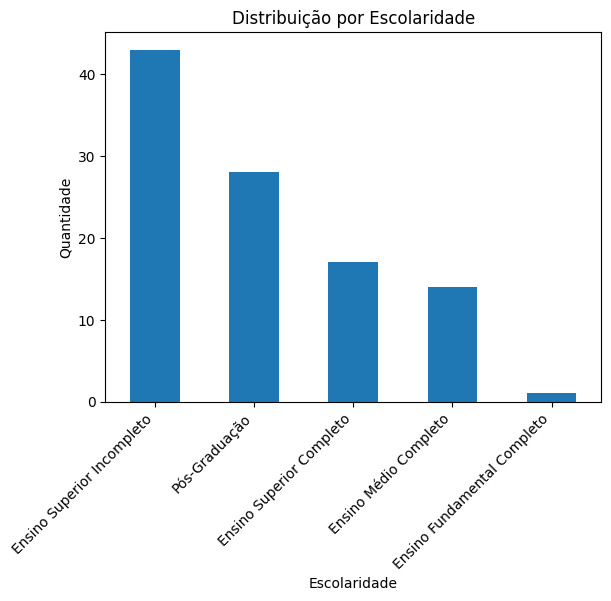

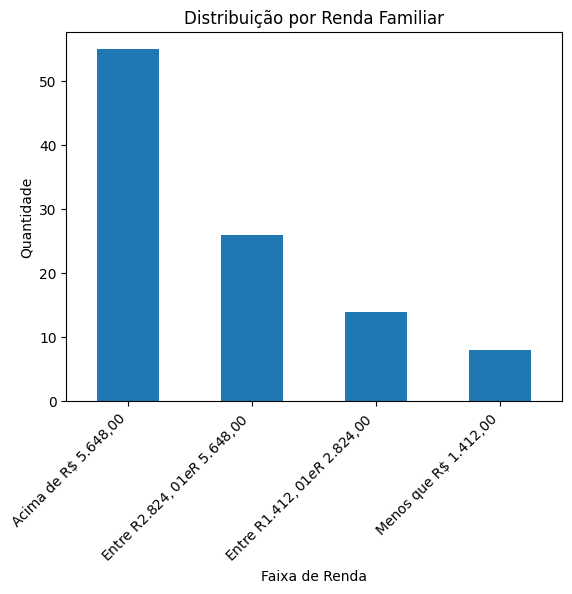

In [4]:
# Gráfico por sexo
data['Qual é o seu sexo? '].value_counts().plot(kind='bar', title='Distribuição por Sexo')
plt.ylabel('Quantidade')
plt.xlabel('Sexo')
plt.show()

# Gráfico por faixa etária
data['Qual é a sua idade? '].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Distribuição por Faixa Etária')
plt.ylabel('')
plt.show()

# Gráfico por escolaridade
data['Qual é a sua escolaridade? '].value_counts().plot(kind='bar', title='Distribuição por Escolaridade')
plt.ylabel('Quantidade')
plt.xlabel('Escolaridade')
plt.xticks(rotation=45, ha='right')
plt.show()

# Gráfico por renda
data['\nQual é sua renda familiar mensal? [A renda familiar é a soma de todos os ganhos financeiros dos membros de uma família que moram no mesmo endereço].'].value_counts().plot(kind='bar', title='Distribuição por Renda Familiar')
plt.ylabel('Quantidade')
plt.xlabel('Faixa de Renda')
plt.xticks(rotation=45, ha='right')
plt.show()


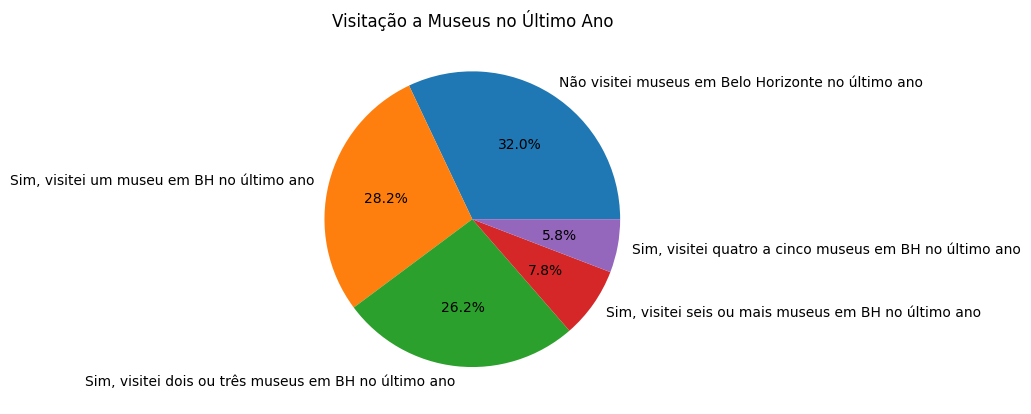

In [26]:
# Frequência de visitas
data['Você visitou algum museu em Belo Horizonte no último ano?'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Visitação a Museus no Último Ano')
plt.ylabel('')
plt.show()




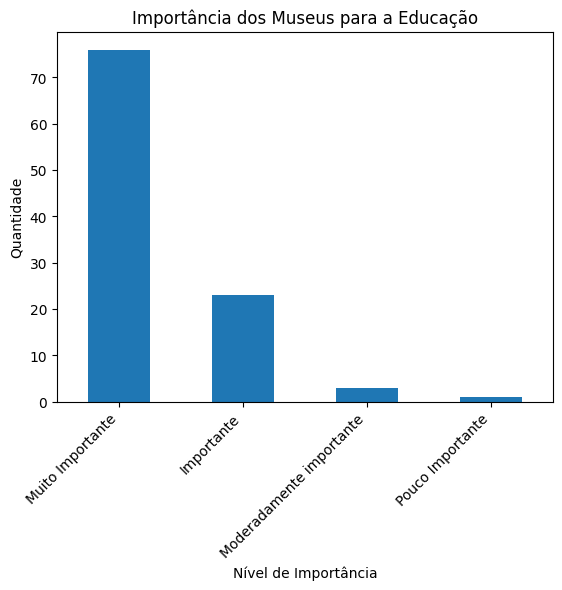

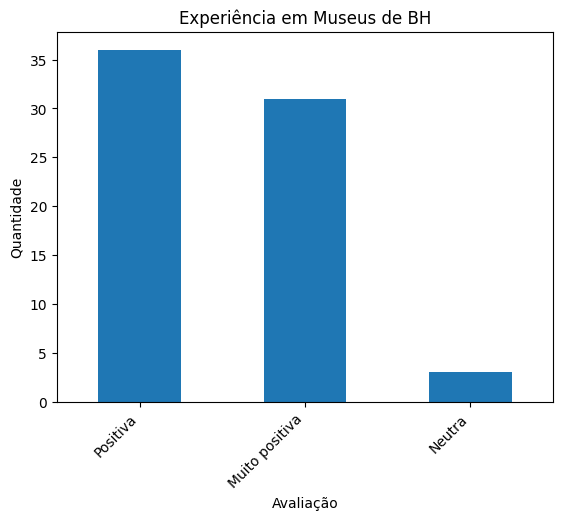

In [6]:
# Importância dos museus
data['Para você, qual o nível de importância dos museus para a educação na sociedade?'].value_counts().plot(kind='bar', title='Importância dos Museus para a Educação')
plt.ylabel('Quantidade')
plt.xlabel('Nível de Importância')
plt.xticks(rotation=45, ha='right')
plt.show()

# Experiência em museus
data['Como você definiria a sua experiência em Museus em Belo Horizonte?'].value_counts().plot(kind='bar', title='Experiência em Museus de BH')
plt.ylabel('Quantidade')
plt.xlabel('Avaliação')
plt.xticks(rotation=45, ha='right')
plt.show()


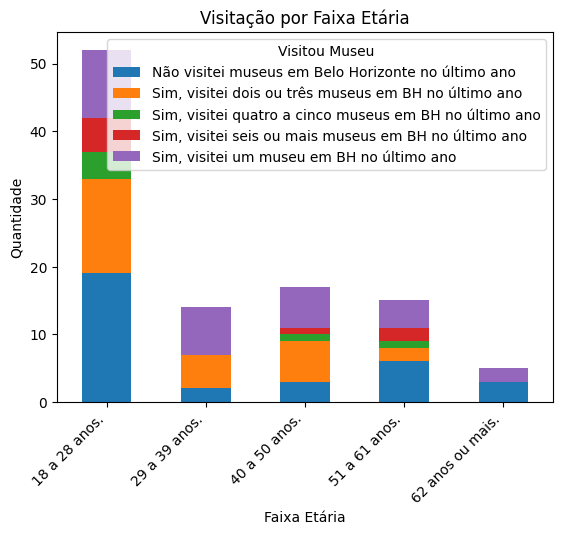

In [11]:
import seaborn as sns

# Cruzar Faixa Etária x Visitação
cross_age_visit = data.groupby(['Qual é a sua idade? ', 'Você visitou algum museu em Belo Horizonte no último ano?']).size().unstack()

# Gráfico
cross_age_visit.plot(kind='bar', stacked=True)
plt.title('Visitação por Faixa Etária')
plt.ylabel('Quantidade')
plt.xlabel('Faixa Etária')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Visitou Museu', loc='upper right')
plt.show()


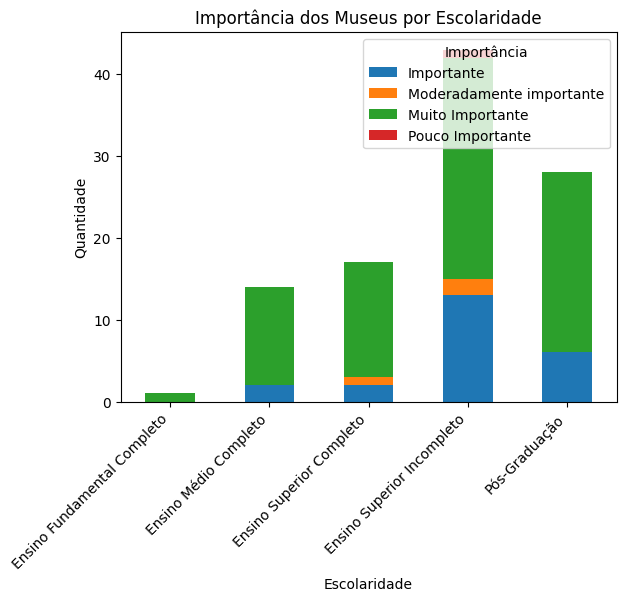

In [12]:
# Cruzar Escolaridade x Importância
cross_edu_importance = data.groupby(['Qual é a sua escolaridade? ', 'Para você, qual o nível de importância dos museus para a educação na sociedade?']).size().unstack()

# Gráfico
cross_edu_importance.plot(kind='bar', stacked=True)
plt.title('Importância dos Museus por Escolaridade')
plt.ylabel('Quantidade')
plt.xlabel('Escolaridade')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Importância', loc='upper right')
plt.show()


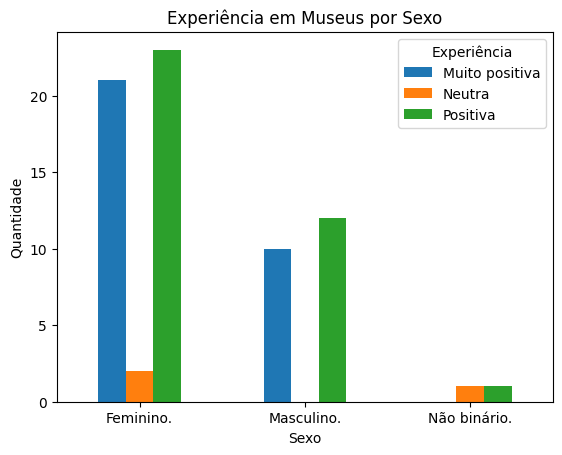

In [13]:
# Cruzar Sexo x Experiência
cross_sex_experience = data.groupby(['Qual é o seu sexo? ', 'Como você definiria a sua experiência em Museus em Belo Horizonte?']).size().unstack()

# Gráfico
cross_sex_experience.plot(kind='bar')
plt.title('Experiência em Museus por Sexo')
plt.ylabel('Quantidade')
plt.xlabel('Sexo')
plt.xticks(rotation=0)
plt.legend(title='Experiência', loc='upper right')
plt.show()


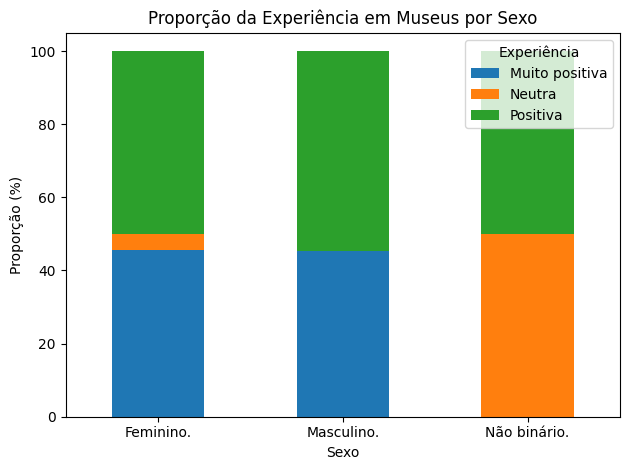

In [27]:
# Reimportar bibliotecas necessárias


# Cruzar Sexo x Experiência e calcular as proporções
cross_sex_experience = data.groupby(['Qual é o seu sexo? ', 'Como você definiria a sua experiência em Museus em Belo Horizonte?']).size().unstack()

# Calcular as proporções por sexo
cross_sex_experience_percentage = cross_sex_experience.div(cross_sex_experience.sum(axis=1), axis=0) * 100

# Gráfico
cross_sex_experience_percentage.plot(kind='bar', stacked=True)
plt.title('Proporção da Experiência em Museus por Sexo')
plt.ylabel('Proporção (%)')
plt.xlabel('Sexo')
plt.xticks(rotation=0)
plt.legend(title='Experiência', loc='upper right')
plt.tight_layout()
plt.show()


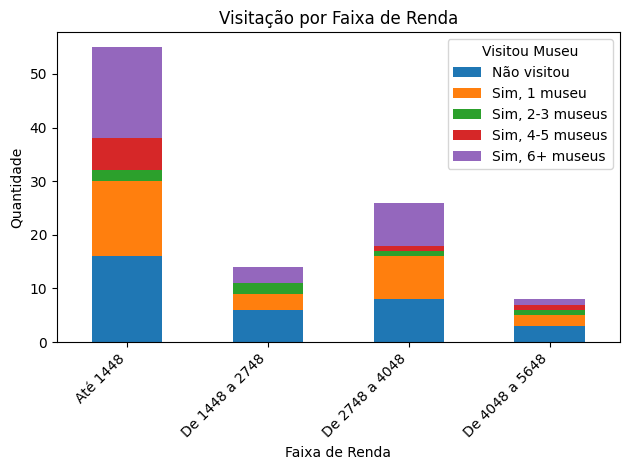

In [56]:
# Cruzar Renda x Visitação
cross_income_visit = data.groupby(['\nQual é sua renda familiar mensal? [A renda familiar é a soma de todos os ganhos financeiros dos membros de uma família que moram no mesmo endereço].', 
                                   'Você visitou algum museu em Belo Horizonte no último ano?']).size().unstack()

# Gráfico
ax = cross_income_visit.plot(kind='bar', stacked=True)

# Ajustar título e rótulos
plt.title('Visitação por Faixa de Renda')
plt.ylabel('Quantidade')
plt.xlabel('Faixa de Renda')

# Definir n_barras como o número de barras no gráfico
n_barras = len(cross_income_visit.index)

# Definir manualmente os rótulos do eixo X para as faixas de renda
faixa_renda_labels = ['Até 1448', 'De 1448 a 2748', 'De 2748 a 4048', 'De 4048 a 5648', 'Acima de 5648']
plt.xticks(ticks=range(n_barras), labels=faixa_renda_labels[:n_barras], rotation=45, ha='right')

# Ajustar a legenda
plt.legend(title='Visitou Museu', labels=['Não visitou', 'Sim, 1 museu', 'Sim, 2-3 museus', 'Sim, 4-5 museus', 'Sim, 6+ museus'], loc='upper right')

# Exibir gráfico
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

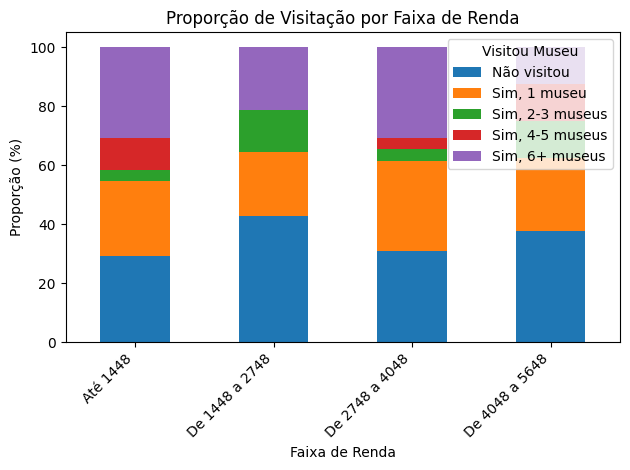

In [57]:

# Cruzar Renda x Visitação
cross_income_visit = data.groupby(['\nQual é sua renda familiar mensal? [A renda familiar é a soma de todos os ganhos financeiros dos membros de uma família que moram no mesmo endereço].', 
                                   'Você visitou algum museu em Belo Horizonte no último ano?']).size().unstack()

# Calcular as proporções por faixa de renda
cross_income_visit_percentage = cross_income_visit.div(cross_income_visit.sum(axis=1), axis=0) * 100

# Ajustar os rótulos do eixo X para melhor legibilidade
plt.figure(figsize=(10, 6))

# Plotar o gráfico com os dados
cross_income_visit_percentage.plot(kind='bar', stacked=True)

# Ajustar o título e os rótulos do gráfico
plt.title('Proporção de Visitação por Faixa de Renda')
plt.ylabel('Proporção (%)')
plt.xlabel('Faixa de Renda')

# Verificar o número de barras no gráfico
n_barras = len(cross_income_visit_percentage.index)

# Definir manualmente os rótulos do eixo X para as faixas de renda
faixa_renda_labels = ['Até 1448', 'De 1448 a 2748', 'De 2748 a 4048', 'De 4048 a 5648', 'Acima de 5648']

# Ajuste de rótulos do eixo X
plt.xticks(ticks=range(n_barras), labels=faixa_renda_labels[:n_barras], rotation=45, ha='right')

# Ajustar a posição e formato da legenda
plt.legend(title='Visitou Museu',  labels=['Não visitou', 'Sim, 1 museu', 'Sim, 2-3 museus', 'Sim, 4-5 museus', 'Sim, 6+ museus'], loc='upper right')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()
plt.show()


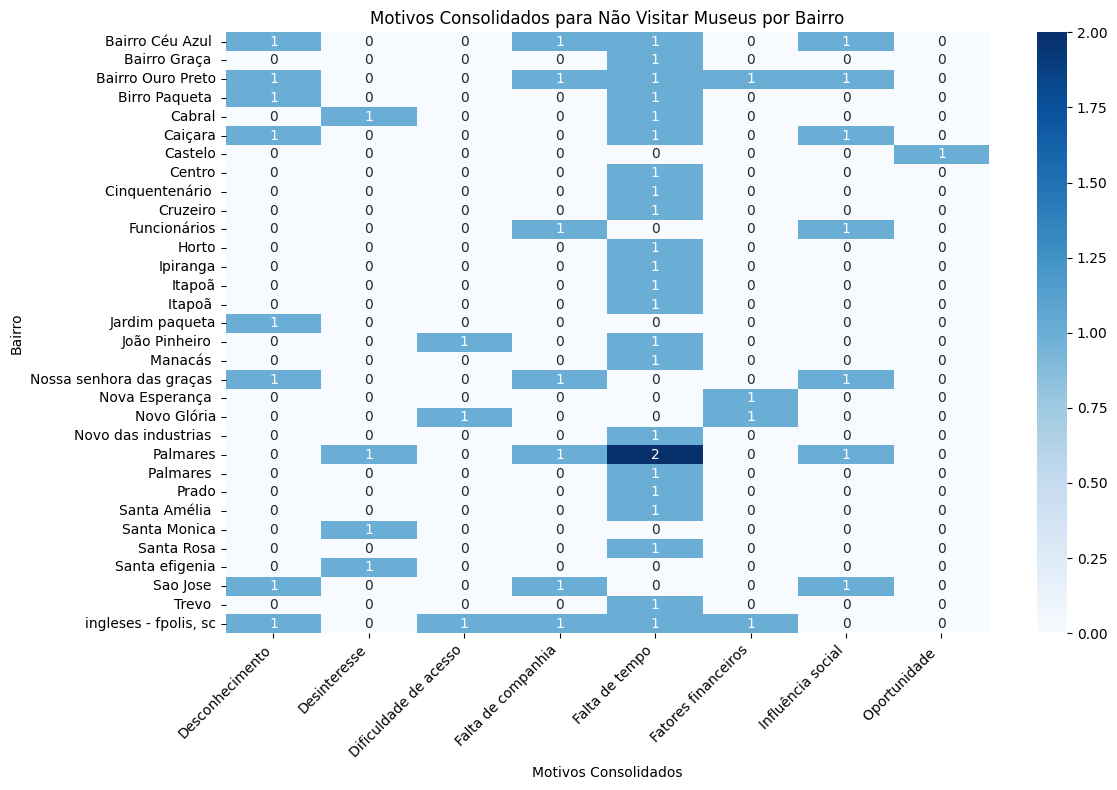

In [67]:
# Extrair as colunas relevantes
motivos_coluna = 'Caso você não tenha visitado museus em Belo Horizonte no último ano, marque uma ou mais alternativas que indiquem os motivos.  '
bairro_coluna = 'Em qual bairro você reside? '

# Criar DataFrame somente com as colunas de interesse
data_filtrada = data[[bairro_coluna, motivos_coluna]].dropna()

# Explodir os motivos em linhas separadas
motivos_exploded = data_filtrada[motivos_coluna].str.split(', ').explode()

# Separar respostas combinadas por ponto-e-vírgula
motivos_separados = motivos_exploded.str.split(';').explode()

# Repetir os bairros para alinhá-los com os motivos explodidos
bairros_repetidos = data_filtrada[bairro_coluna].repeat(motivos_separados.groupby(level=0).size()).reset_index(drop=True)

# Criar DataFrame consolidado com bairros e motivos separados
data_consolidada = pd.DataFrame({
    bairro_coluna: bairros_repetidos,
    'Motivos Consolidados': motivos_separados.reset_index(drop=True)
})

# Mapear motivos para categorias consolidadas
categoria_map = {
    'Falta de tempo': 'Falta de tempo',
    'Não conheço nenhum museu (falta divulgação)': 'Desconhecimento',
    'Não gosto de museus': 'Desinteresse',
    'Falta dinheiro': 'Fatores financeiros',
    'Tenho dificuldade para acessar museus (transporte e outros)': 'Dificuldade de acesso',
    'Não tenho companhia': 'Falta de companhia',
    'Meus amigos/familiares não vão a museus': 'Influência social',
    'Oportunidade': 'Outros'
}

# Substituir motivos pela categoria consolidada
data_consolidada['Motivos Consolidados'] = data_consolidada['Motivos Consolidados'].replace(categoria_map)

# Agrupar apenas pelo nome do bairro, somando as ocorrências dos motivos
data_grouped = data_consolidada.groupby([bairro_coluna, 'Motivos Consolidados']).size().unstack(fill_value=0)



# Gerar o gráfico de heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data_grouped, annot=True, fmt="d", cmap="Blues")
plt.title('Motivos Consolidados para Não Visitar Museus por Bairro')
plt.xlabel('Motivos Consolidados')
plt.ylabel('Bairro')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


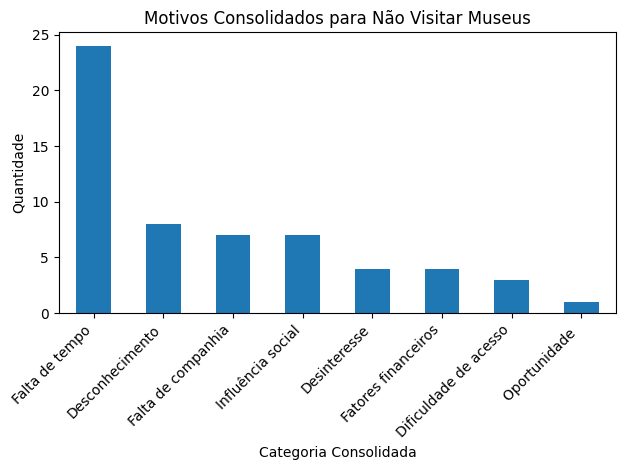

In [24]:
# Extrair a coluna de motivos (ajustar o nome da coluna conforme a base)
motivos_coluna = 'Caso você não tenha visitado museus em Belo Horizonte no último ano, marque uma ou mais alternativas que indiquem os motivos.  '

# Remover valores nulos e consolidar múltiplas respostas em uma string
motivos = data[motivos_coluna].dropna()

# Explodir múltiplas respostas em linhas separadas
alternativas_exploded = motivos.str.split(', ').explode()

# Dividir respostas combinadas por ponto-e-vírgula em linhas separadas
motivos_separados = alternativas_exploded.str.split(';').explode()

# Mapear respostas para categorias consolidadas
categoria_map = {
    'Falta de tempo': 'Falta de tempo',
    'Não conheço nenhum museu (falta divulgação)': 'Desconhecimento',
    'Não gosto de museus': 'Desinteresse',
    'Falta dinheiro': 'Fatores financeiros',
    'Tenho dificuldade para acessar museus (transporte e outros)': 'Dificuldade de acesso',
    'Não tenho companhia': 'Falta de companhia',
    'Meus amigos/familiares não vão a museus': 'Influência social',
    'Oportunidade': 'Outros'
}

# Consolidar os motivos
motivos_consolidados = motivos_separados.replace(categoria_map)

# Contar ocorrências de cada categoria consolidada
contagem_consolidada = motivos_consolidados.value_counts()

# Gerar o gráfico
import matplotlib.pyplot as plt

contagem_consolidada.plot(kind='bar', title='Motivos Consolidados para Não Visitar Museus')
plt.ylabel('Quantidade')
plt.xlabel('Categoria Consolidada')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
